In [22]:
import pandas as pd

url = "https://raw.githubusercontent.com/100daysofml/100daysofml.github.io/refs/heads/main/content/Week_03/titanic.csv"
titanic_data = pd.read_csv(url)
titanic_data_original = pd.read_csv(url)

print(titanic_data.head())
print(titanic_data.isnull().sum())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         1  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN        S         0  
4  22.0      1      1  3101298  12.2875   NaN        S         1  
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Par

In [ ]:
# titanic_data.fillna({'Age': titanic_data['Age'].median()}, inplace=True)

In [ ]:
# #mode imputation

# embarked_mode = titanic_data['Embarked'].mode()[0]
# #titanic_data['Embarked'].fillna(embarked_mode, inplace=True)
# titanic_data.fillna({'Embarked': embarked_mode}, inplace=True)

In [ ]:
# #k nearest neighbor 

# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=3)
# numeric_columns = titanic_data.select_dtypes(include=['float64', 'int64'])
# titanic_data[numeric_columns.columns] = imputer.fit_transform(numeric_columns)

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np
from sklearn.linear_model import BayesianRidge

#create a copy
titanic_data_imputed = titanic_data.copy()

#Using Iterative Imputer with BayesianRidge estimator
iterative_imputer = IterativeImputer(estimator=BayesianRidge(), missing_values=np.nan, max_iter=10, random_state=0)

#Numeric columns
numeric_columns = titanic_data.select_dtypes(include=['float64', 'int64'])

#Assuming 'titanic_data' has some MNAR data
numeric_imputed = iterative_imputer.fit_transform(numeric_columns)

#Replace original data with imputed data
titanic_data_imputed[numeric_columns.columns] = numeric_imputed

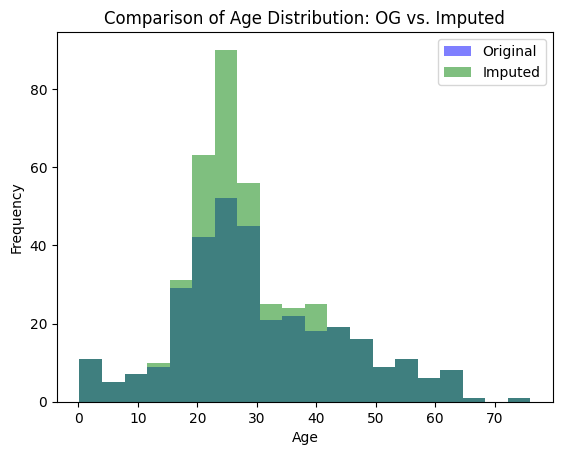

In [24]:
#Evaluating Imputation Techniques
import matplotlib.pyplot as plt

#histogram of Age before imputation
plt.hist(titanic_data_original['Age'].dropna(), bins=20, alpha=0.5, color='blue', label='Original')
plt.hist(titanic_data_imputed['Age'], bins=20, alpha=0.5, color='green', label="Imputed")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Comparison of Age Distribution: OG vs. Imputed')
plt.legend()
plt.show()
